In [178]:
# Global imports and settings

# Matplotlib
%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["figure.max_open_warning"] = -1

# Print options
import numpy as np
np.set_printoptions(precision=3)

# Slideshow
from notebook.services.config import ConfigManager
cm = ConfigManager()
cm.update('livereveal', {'width': 1440, 'height': 720, 'scroll': True})

# Silence warnings
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<center>
    <img src="img/scikit-learn-logo.png" width="40%" />
    <br />
    <h1>An introduction to Machine Learning with Scikit-Learn</h1>
    <br /><br />
    Gilles Louppe (<a href="https://twitter.com/glouppe">@glouppe</a>), November 12, 2015
    <br /><br />
    Data Science @ LHC 2015, CERN
</center>

## Prerequisites 

In [179]:
# This is an IPython notebook, with executable Python code inside
from __future__ import braces

SyntaxError: not a chance (<ipython-input-179-8ea16afe3b06>, line 2)

- Materials available on  <a href="https://github.com/glouppe/tutorial-sklearn-dslhc2015">GitHub</a>
    
- Require a Python distribution with scientific packages (NumPy, SciPy, Scikit-Learn, Pandas)

- ... or Anaconda http://continuum.io/downloads

    

# Outline

* Scikit-Learn and the scientific ecosystem in Python
* Classification
* Model evaluation and selection
* Pipelines and feature unions
* Outlier detection
* Summary

# Scikit-Learn

## Overview

* Machine learning library written in __Python__
* __Simple and efficient__, for both experts and non-experts
* Classical, __well-established machine learning algorithms__
* Shipped with <a href="http://scikit-learn.org/dev/documentation.html">documentation</a> and <a href="http://scikit-learn.org/dev/auto_examples/index.html">examples</a>
* __BSD 3 license__

## Community driven development

- 20~ core developers (mostly researchers)
- 500+ occasional contributors
- __All working publicly together__ on [GitHub](https://github.com/scikit-learn/scikit-learn)
- Emphasis on __keeping the project maintainable__
    - Style consistency
    - Unit-test coverage
    - Documentation and examples
    - Code review
- Join us!

## Python stack for data analysis

- The __open source__ Python ecosystem provides __a standalone, versatile and powerful scientific working environment__, including: [NumPy](http://numpy.org), [SciPy](http://scipy.org), [IPython](http://ipython.org), [Matplotlib](http://matplotlib.org), [Pandas](http://pandas.pydata.org/), _and many others..._

<center> 
<img src="img/scikit-learn-logo.png" style="max-width: 120px; display: inline" />
<img src="img/numpy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/scipy-logo.png" style="max-width: 120px; display: inline" />
<img src="img/ipython-logo.jpg" style="max-width: 120px; display: inline" />
<img src="img/matplotlib-logo.png" style="max-width: 120px; display: inline"/>
<img src="img/pandas-logo.png" style="max-width: 120px; display: inline" />
</center>

- Scikit-Learn builds upon NumPy and SciPy and __complements__ this scientific environment with machine learning algorithms;
- By design, Scikit-Learn is __non-intrusive__, easy to use and easy to combine with other libraries;
- Core algorithms are implemented in low-level languages.

## Algorithms

__Supervised learning:__

* Linear models (Ridge, Lasso, Elastic Net, ...)
* Support Vector Machines
* Tree-based methods (Random Forests, Bagging, GBRT, ...)
* Nearest neighbors
* Neural networks 
* Gaussian Processes
* Feature selection

__Unsupervised learning:__

* Clustering (KMeans, Ward, ...)
* Matrix decomposition (PCA, ICA, ...)
* Density estimation
* Outlier detection

__Model selection and evaluation:__

* Cross-validation
* Grid-search
* Lots of metrics

_... and many more!_ (See our [Reference](http://scikit-learn.org/dev/modules/classes.html))

# Classification

## Framework

Data comes as a finite learning set ${\cal L} = (X, y)$ where
* Input samples are given as an array $X$ of shape `n_samples` $\times$ `n_features`, taking their values in ${\cal X}$;
* Output values are given as an array $y$, taking _symbolic_ values in ${\cal Y}$.
  
The goal of supervised classification is to build an estimator $\varphi_{\cal L}: {\cal X} \mapsto {\cal Y}$ minimizing

$$
Err(\varphi_{\cal L}) = \mathbb{E}_{X,Y}\{ L(Y, \varphi_{\cal L}(X)) \}
$$

where $L$ is a loss function, e.g., the zero-one loss for classification $L_{01}(Y,\hat{Y}) = 1(Y = \hat{Y})$.

## Applications

- Classifying signal from background events; 
- Diagnosing disease from symptoms;
- Recognising cats in pictures;
- ...
  

## Data 

- Input data = Numpy arrays or Scipy sparse matrices ;
- Leverage efficient vector operations ;
- Keep code short and readable. 

In [180]:
# Generate data
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=20)
labels = ["b", "r"]
y = np.take(labels, (y < 10))

print(X[:3])
print(y[:3])

[[-11.23   -9.361]
 [  1.039  -8.528]
 [ -3.227   6.079]]
['r' 'b' 'b']


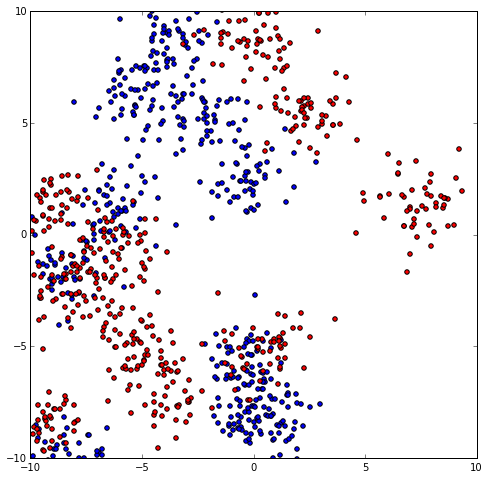

In [181]:
# Plot
plt.figure()
for label in labels:
    mask = (y == label)
    plt.scatter(X[mask, 0], X[mask, 1], c=label)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()

## A simple and unified API

All learning algorithms in scikit-learn share a uniform and limited API consisting of complementary interfaces:

- an `estimator` interface for building and fitting models;
- a `predictor` interface for making predictions;
- (a `transformer` interface for converting data.)

### Estimators

An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.

In [182]:
class Estimator(object):
    def fit(self, X, y=None):
        """Fits estimator to data."""
        # set state of ``self``
        return self
            
    def predict(self, X):
        """Predict response of ``X``."""
        # compute predictions ``pred``
        return pred

In [183]:
# Import the nearest neighbor class
from sklearn.neighbors import KNeighborsClassifier  # Change this to try 
                                                    # something else

# Set hyper-parameters, for controlling algorithm
clf = KNeighborsClassifier(n_neighbors=5)

# Learn a model from training data
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [184]:
# Estimator state is stored in instance attributes
clf._tree

### Predictors

In [185]:
# Make predictions 
print(clf.predict(X[:5])) 

['r' 'b' 'b' 'r' 'b']


In [186]:
# Compute class probabilities
print(clf.predict_proba(X[:5]))

[[ 0.2  0.8]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 0.2  0.8]
 [ 1.   0. ]]


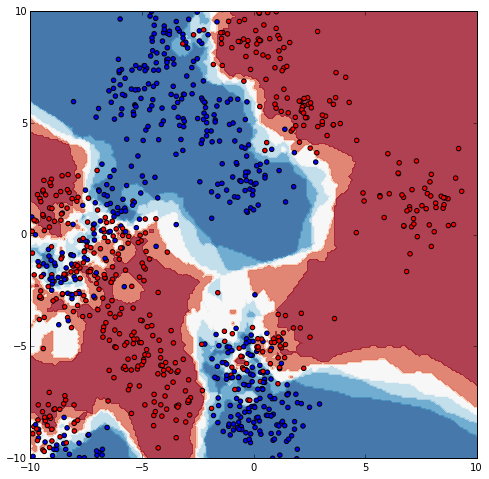

In [187]:
# Plot decision surface
def plot_surface(clf, X, y, xlim=(-10, 10), ylim=(-10, 10), n_steps=250, subplot=None, show=True):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)
        
    xx, yy = np.meshgrid(np.linspace(*xlim, n_steps), np.linspace(*ylim, n_steps))
    
    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
        
    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)
    
    if show:
        plt.show()
    
plot_surface(clf, X, y)

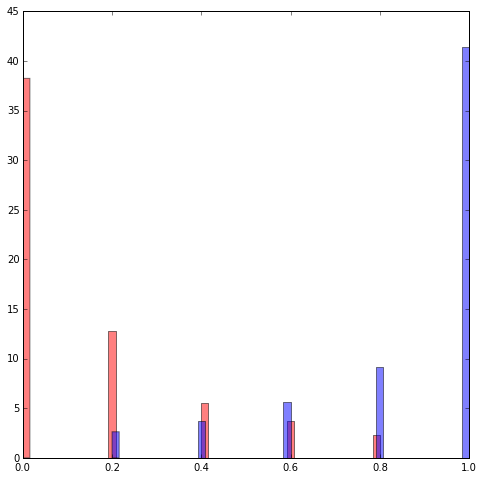

In [188]:
# Plot decision histograms
def plot_histogram(clf, X, y, subplot=None, show=True):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)
    
    if hasattr(clf, "decision_function"):
        d = clf.decision_function(X)
    else:
        d = clf.predict_proba(X)[:, 0]
    
    plt.hist(d[y == "r"], bins=50, normed=True, color="r", alpha=0.5)
    plt.hist(d[y == "b"], bins=50, normed=True, color="b", alpha=0.5)
    
    if show:
        plt.show()
    
plot_histogram(clf, X, y)

In [189]:
def plot_clf(clf, X, y):
    plt.figure(figsize=(16, 8))
    plot_surface(clf, X, y, subplot=(1, 2, 1), show=False)
    plot_histogram(clf, X, y, subplot=(1, 2, 2), show=True)

# Classifier zoo

## Decision trees

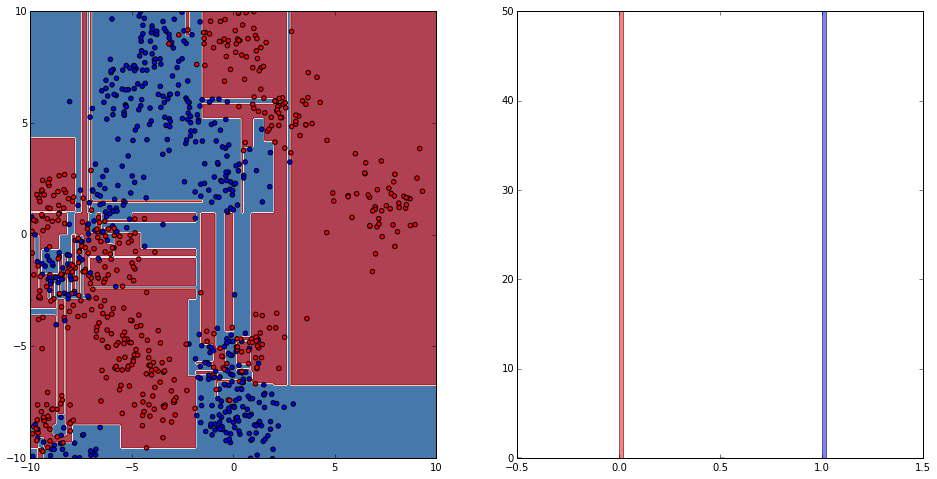

In [190]:
from sklearn.tree import DecisionTreeClassifier 
clf = DecisionTreeClassifier()
clf.fit(X, y)
plot_clf(clf, X, y)

## Random Forests

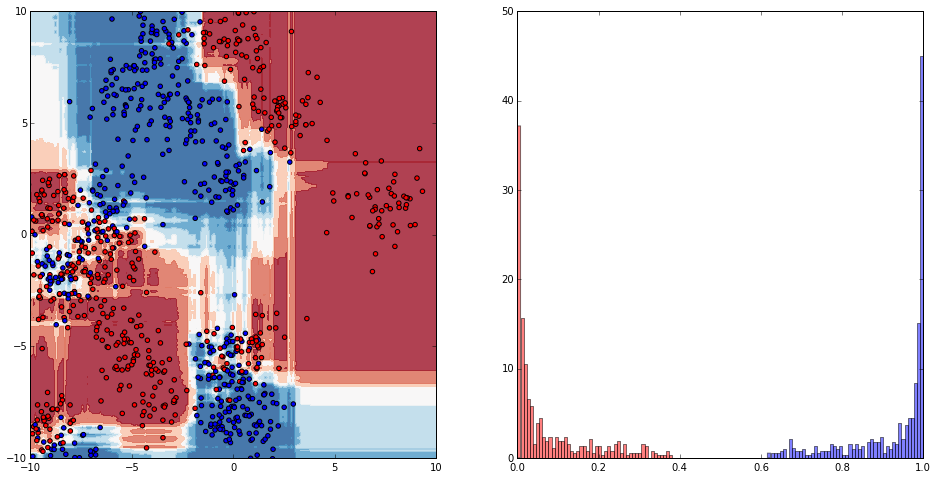

In [191]:
from sklearn.ensemble import RandomForestClassifier 
clf = RandomForestClassifier(n_estimators=500)
#from sklearn.ensemble import ExtraTreesClassifier 
#clf = ExtraTreesClassifier(n_estimators=500)
clf.fit(X, y)
plot_clf(clf, X, y)

## Support vector machines

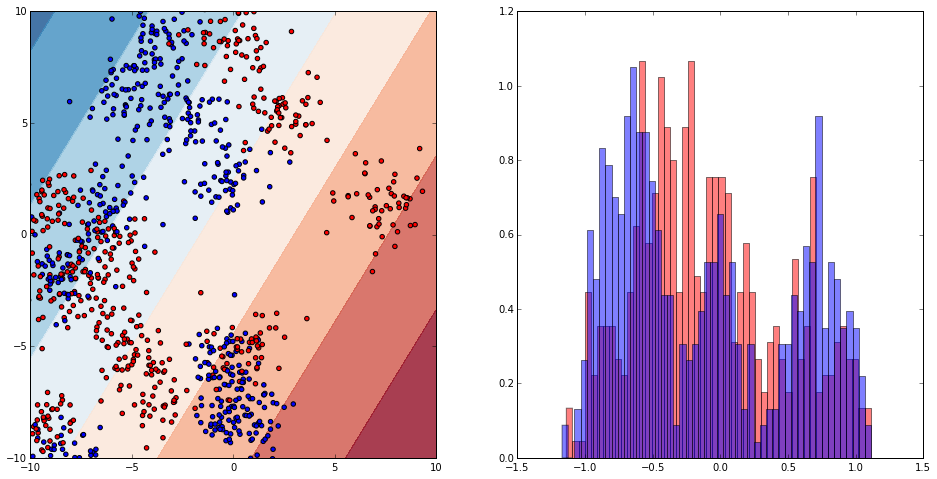

In [192]:
from sklearn.svm import SVC
clf = SVC(kernel="linear")
#clf = SVC(kernel="rbf")
clf.fit(X, y)
plot_clf(clf, X, y)

## Gaussian Processes

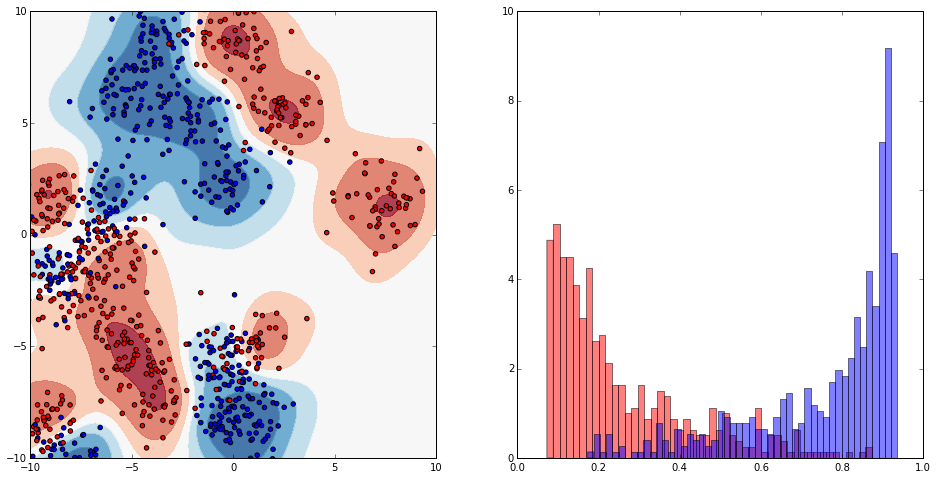

In [193]:
from sklearn.gaussian_process import GaussianProcessClassifier
clf = GaussianProcessClassifier()
clf.fit(X, y)
plot_clf(clf, X, y)

## Multi-layer perceptron

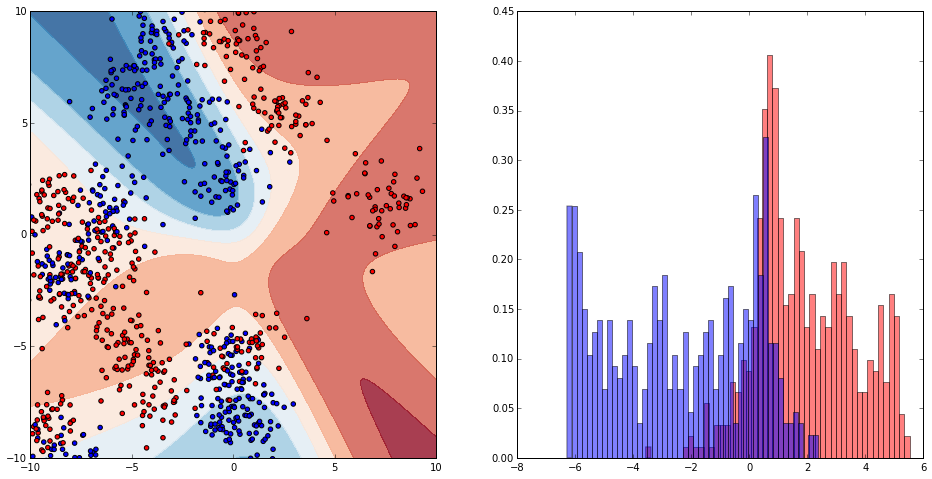

In [194]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(hidden_layer_sizes=(100, 100, 100), activation="tanh")
clf.fit(X, y)
plot_clf(clf, X, y)

# Model evaluation and selection

## Evaluation

- Recall that we want to learn an estimator $\varphi_{\cal L}$ minimizing the generalization error $Err(\varphi_{\cal L}) = \mathbb{E}_{X,Y}\{ L(Y, \varphi_{\cal L}(X)) \}$.

- Problem: Since $P_{X,Y}$ is unknown, the generalization error $Err(\varphi_{\cal L})$ cannot be evaluated.

- Solution: Use a proxy to approximate $Err(\varphi_{\cal L})$.

## Training error

In [195]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)
print("Training error =", 1. - accuracy_score(y, clf.predict(X)))

Training error = 0.099


In [196]:
# Estimators come a built-in default evaluation score
print("Score =", clf.score(X, y))

Score = 0.901


## Test error

Issue: the training error is a __biased__ estimate of the generalization error.

Solution: Divide ${\cal L}$ into two disjoint parts called training and test sets (usually using 70% for training and 30% for test).
- Use the training set for building the model;
- Use the test set for evaluation only, thereby yielding an unbiased estimate.

In [197]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)
print("Training error =", 1. - accuracy_score(y_train, clf.predict(X_train)))
print("Test error =", 1. - accuracy_score(y_test, clf.predict(X_test)))

Training error = 0.102666666667
Test error = 0.14


Summary: Beware of bias when you estimate model performance:
- Training score is often an optimistic estimate of the true performance;
- __The same data should not be used both for training and evaluation.__

## Cross-validation

Issue: 
- When ${\cal L}$ is small, training on 70% of the data may lead to a model that is significantly different from a model that would have been learned on the entire set ${\cal L}$. 
- Yet, increasing the size of the training set (resp. decreasing the size of the test set), might lead to an inaccurate estimate of the generalization error. 

Solution: K-Fold cross-validation. 
- Split ${\cal L}$ into K small disjoint folds. 
- Train on K-1 folds, evaluate the test error one the held-out fold.
- Repeat for all combinations and average the K estimates of the generalization error.

<center>![](img/cross-validation.png)</center>

In [198]:
from sklearn.model_selection import KFold

scores = []

for train, test in KFold(n_folds=5, random_state=42).split(X):
    X_train, y_train = X[train], y[train]
    X_test, y_test = X[test], y[test]
    clf = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
    scores.append(1. - accuracy_score(y_test, clf.predict(X_test)))

print("CV error = %f +-%f" % (np.mean(scores), np.std(scores)))

CV error = 0.148000 +-0.023791


In [199]:
# Shortcut
from sklearn.model_selection import cross_val_score
scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), 
                         X, y, cv=KFold(n_folds=5, random_state=42), 
                         scoring="accuracy")
print("CV error = %f +-%f" % (1. - np.mean(scores), np.std(scores)))

CV error = 0.148000 +-0.023791


## Model selection
 
- Finding good hyper-parameters is crucial to control under- and over-fitting, hence achieving better performance.
- The estimated generalization error can be used to select the best model.

## Under- and over-fitting

- Under-fitting: the model is too simple and does not capture the true relation between X and Y.
- Over-fitting: the model is too specific to the training set and does not generalize.

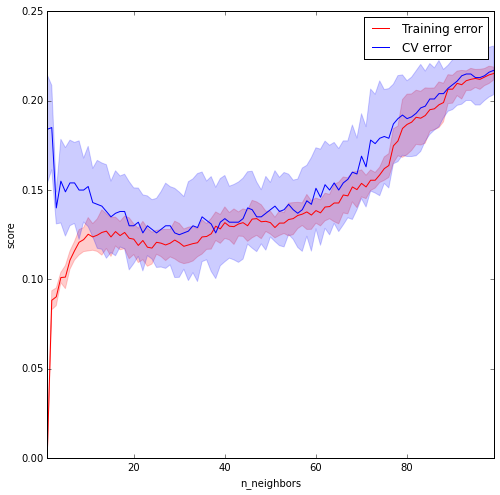

In [200]:
from sklearn.model_selection import validation_curve

param_range = range(1, 100)
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X, y, 
    param_name="n_neighbors", 
    param_range=param_range, cv=5, n_jobs=-1)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.xlabel("n_neighbors")
plt.ylabel("score")
plt.xlim(min(param_range), max(param_range))
plt.plot(param_range, 1. - train_scores_mean, color="red", label="Training error")
plt.fill_between(param_range, 
                 1. - train_scores_mean + train_scores_std,
                 1. - train_scores_mean - train_scores_std,
                 alpha=0.2, color="red")
plt.plot(param_range, 1. - test_scores_mean, color="blue", label="CV error")
plt.fill_between(param_range, 
                 1. - test_scores_mean + test_scores_std,
                 1. - test_scores_mean - test_scores_std, 
                 alpha=0.2, color="blue")
plt.legend(loc="best")

In [201]:
# Best trade-off
print("n_neighbors = %d, CV error = %f" % (param_range[np.argmax(test_scores_mean)],
                                           1. - np.max(test_scores_mean)))

n_neighbors = 30, CV error = 0.125000


## Hyper-parameter search

In [202]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(KNeighborsClassifier(),
                    param_grid={"n_neighbors": list(range(1, 100))},
                    scoring="accuracy",
                    cv=5, n_jobs=-1)
grid.fit(X, y)

print("Best score = %f, Best parameters = %s" % (1. - grid.best_score_, 
                                                 grid.best_params_))

Best score = 0.125000, Best parameters = {'n_neighbors': 30}


Question: Should you report the best score as an estimate of the generalization error of the model?

## Selection and evaluation, _simultaneously_

- The estimate `grid.best_score_` is not independent from the best model, since its construction was guided by the optimization of this quantity. 

- As a result, the optimized `grid.best_score_` estimate _may_ in fact be a biased, optimistic, estimate of the true performance of the model. 

- Solution: Use __nested__ cross-validation for correctly selecting the model and correctly evaluating its performance. 

In [203]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

scores = cross_val_score(
            GridSearchCV(KNeighborsClassifier(),
                                param_grid={"n_neighbors": list(range(1, 100))},
                                scoring="accuracy",
                                cv=5, n_jobs=-1), 
            X, y, cv=5, scoring="accuracy")

# Unbiased estimate of the accuracy
print("%f +-%f" % (1. - np.mean(scores), np.std(scores)))

0.132000 +-0.022045


In [204]:
break

SyntaxError: 'break' outside loop (<ipython-input-204-b20fcc2397e7>, line 1)

# Pipelines and feature unions

## Transformers

## Transformer zoo

## Pipelines

## Feature unions

## Nested composition

# Outlier detection

# Summary

- Scikit-Learn provides essential tools for machine learning. 
- It is more than training classifiers!
- It integrates within a larger Python scientific ecosystem.
- Try it for yourself!

In [ ]:
questions?